In [839]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [840]:
# Loading the Dataset from google drive
path = "/content/drive/MyDrive/customer_churn.csv"
data = pd.read_csv(path)

In [841]:
# Keeping copy of the data
df = data.copy()

# **Data Overview**

# **Checking the no.of rows and columns**

In [842]:
df.shape

(12055, 20)

**Checking 1st 5 rows**

In [843]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85,$29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,$56.95,$1889.5,NO
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85,$108.15,YES
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,bank transfer (automatic),$42.3,$1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,ELECTRONIC CHECK,$70.7,$nan,yes


# **Checking the types of data**

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  int64  
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

# **Checking for duplicate values**

In [845]:
df.duplicated().sum()

np.int64(2)

In [846]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5759,Female,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,MAILED CHECK,$70.15,$70.15,Yes
12043,Female,0,Yes,Yes,50.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),$20.55,$1070.25,No




*   These duplicates are not actual duplicates.


# **Checking no.of USD rows and GBP rows**

In [847]:
usd_rows = df["TotalCharges"].str.contains(r"\$", na=False)
gbp_rows = df["TotalCharges"].str.contains(r"£", na=False)

print("USD rows:", usd_rows.sum())
print("GBP rows:", gbp_rows.sum())


USD rows: 11871
GBP rows: 184


In [848]:
usd_rows = df["MonthlyCharges"].str.contains(r"\$", na=False)
gbp_rows = df["MonthlyCharges"].str.contains(r"£", na=False)

print("USD rows:", usd_rows.sum())
print("GBP rows:", gbp_rows.sum())

USD rows: 11871
GBP rows: 184


# **Converting "MonthlyCharges" and "TotalCharges" into "float"**

In [849]:
df["MonthlyCharges"] = (
    df["MonthlyCharges"]
    .replace(r"[\$£,]", "", regex=True)    # removes $, £, and commas
    .replace(r"^\s*$", np.nan, regex=True) # replaces empty strings with NaN
    .astype(float)                         # converts to float
)

In [850]:
df["TotalCharges"] = (
    df["TotalCharges"]
    .replace(r"[\$£,]", "", regex=True)    # removes $, £, and commas
    .replace(r"^\s*$", np.nan, regex=True) # replaces empty strings with NaN
    .astype(float)                         # converts to float
)

In [851]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            12055 non-null  object 
 1   SeniorCitizen     12055 non-null  int64  
 2   Partner           12055 non-null  object 
 3   Dependents        12055 non-null  object 
 4   tenure            11451 non-null  float64
 5   PhoneService      12055 non-null  object 
 6   MultipleLines     12055 non-null  object 
 7   InternetService   12055 non-null  object 
 8   OnlineSecurity    12055 non-null  object 
 9   OnlineBackup      12055 non-null  object 
 10  DeviceProtection  12055 non-null  object 
 11  TechSupport       12055 non-null  object 
 12  StreamingTV       12055 non-null  object 
 13  StreamingMovies   12055 non-null  object 
 14  Contract          12055 non-null  object 
 15  PaperlessBilling  12055 non-null  object 
 16  PaymentMethod     12055 non-null  object

In [852]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,12055.0,0.117959,0.322573,0.00,0.0000,0.00,0.0000,1.00
tenure,11451.0,31.237796,25.027111,-3.00,6.0000,28.00,54.0000,74.00
MonthlyCharges,11754.0,64.366212,30.332938,15.29,30.3125,71.35,89.3775,121.67
TotalCharges,10850.0,2291.757286,2277.461224,-197.00,383.6500,1328.75,3959.0750,9039.92


# **Checking for unique Values and Fixing it**

In [853]:
df.Churn.unique()

array(['  No  ', 'NO', 'YES', 'yes', 'Yes', 'No', 'no', '  Yes  '],
      dtype=object)

In [854]:
df["Churn"] = df["Churn"].replace(["YES","  Yes  ","yes"], "Yes")
df["Churn"] = df["Churn"].replace(["NO", "  No  ","no"], "No")

In [855]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [856]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed Check', 'Mailed check',
       'bank transfer (automatic)', 'ELECTRONIC CHECK',
       '  Electronic check  ', 'credit card (automatic)',
       'BANK TRANSFER (AUTOMATIC)', 'Credit card (automatic)',
       'CREDIT CARD (AUTOMATIC)', 'Bank transfer (automatic)',
       'Electronic Check', 'MAILED CHECK', '  Credit card (automatic)  ',
       'Bank Transfer (Automatic)', '  Mailed check  ',
       '  Bank transfer (automatic)  ', 'Credit Card (Automatic)',
       'electronic check', 'mailed check'], dtype=object)

In [857]:
df["PaymentMethod"] = df["PaymentMethod"].replace(["ELECTRONIC CHECK", "Electronic check","electronic check", "  Electronic check  "], "Electronic Check")
df["PaymentMethod"] = df["PaymentMethod"].replace(["CREDIT CARD (AUTOMATIC)", "credit card (automatic)","Credit card (automatic)","  Credit card (automatic)  "], "Credit Card (Automatic)")
df["PaymentMethod"] = df["PaymentMethod"].replace(["MAILED CHECK", "Mailed check", "mailed check","  Mailed check  "], "Mailed Check")
df["PaymentMethod"] = df["PaymentMethod"].replace(["BANK TRANSFER (AUTOMATIC)", "Bank transfer (automatic)", "bank transfer (automatic)","  Bank transfer (automatic)  " ], "Bank Transfer (Automatic)")

In [858]:
df.PaymentMethod.unique()

array(['Electronic Check', 'Mailed Check', 'Bank Transfer (Automatic)',
       'Credit Card (Automatic)'], dtype=object)

# **Checking and Fixing null and NaN Values**

In [859]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,604
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Filling Blank Values in "tenure" with 0**

In [860]:
df["tenure"] = df["tenure"].fillna(0)

In [861]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Converting Negative values in 'tenure' and 'TotalCharges' into positive value assuming it a typo**

In [862]:
df["tenure"] = df["tenure"].abs()

In [863]:
df.head(75)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer (Automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic Check,70.70,NaN,Yes
5,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic Check,99.65,820.50,Yes
6,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit Card (Automatic),89.10,1949.40,No
7,Female,0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed Check,29.75,301.90,No
8,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic Check,104.80,3046.05,Yes
9,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank Transfer (Automatic),56.15,3487.95,No


In [864]:
df["TotalCharges"] = df["TotalCharges"].abs()

In [865]:
# Statistical Summary for checking min value of Totalcharged
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,12055.0,0.117959,0.322573,0.00,0.0000,0.00,0.0000,1.00
tenure,12055.0,29.697885,25.296620,0.00,4.0000,25.00,53.0000,74.00
MonthlyCharges,11754.0,64.366212,30.332938,15.29,30.3125,71.35,89.3775,121.67
TotalCharges,10850.0,2293.139892,2276.068965,0.00,383.6500,1328.75,3959.0750,9039.92


# **Checking for NaN values**

In [866]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic Check,70.70,NaN,Yes
16,Female,0,No,No,52.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed Check,20.65,NaN,No
23,Female,0,Yes,No,58.0,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Credit Card (Automatic),59.90,NaN,No
36,Male,0,No,No,5.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic Check,69.70,NaN,Yes
41,Female,0,Yes,Yes,70.0,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Two year,Yes,Credit Card (Automatic),69.20,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,Male,0,No,No,2.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed Check,24.24,NaN,Yes
11996,Female,0,No,No,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit Card (Automatic),21.11,NaN,No
12008,Female,0,Yes,Yes,71.0,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,Two year,Yes,Credit Card (Automatic),56.05,NaN,No
12020,Male,0,No,No,56.0,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Bank Transfer (Automatic),82.35,NaN,Yes


In [867]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df["MonthlyCharges"] = df["MonthlyCharges"].fillna(0)

In [868]:
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer (Automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic Check,70.70,0.00,Yes
5,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic Check,99.65,820.50,Yes
6,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit Card (Automatic),89.10,1949.40,No
7,Female,0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed Check,29.75,301.90,No
8,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic Check,104.80,3046.05,Yes
9,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank Transfer (Automatic),56.15,3487.95,No


In [869]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Converting GBP to USD**

In [870]:
# Create a copy for safety
df["MonthlyCharges_USD"] = df["MonthlyCharges"]

# Convert £ values to USD
df.loc[gbp_rows, "MonthlyCharges_USD"] = (
    df.loc[gbp_rows, "MonthlyCharges_USD"]
    .replace(r'[^0-9.]', '', regex=True)
    .astype(float) * 1.33
)

# Convert $ values directly to float (no rate change)
df.loc[usd_rows, "MonthlyCharges_USD"] = (
    df.loc[usd_rows, "MonthlyCharges_USD"]
    .replace(r"[^0-9.]", '', regex=True)
    .astype(float)
)

# Convert entire column to float
df["MonthlyCharges_USD"] = df["MonthlyCharges_USD"].astype(float)

In [871]:
# Create a copy for safety
df["TotalCharges_USD"] = df["TotalCharges"]

# Convert £ values to USD
df.loc[gbp_rows, "TotalCharges_USD"] = (
    df.loc[gbp_rows, "TotalCharges_USD"]
    .replace(r"[^0-9.]", '', regex=True)
    .astype(float) * 1.33
)

# Convert $ values directly to float (no rate change)
df.loc[usd_rows, "TotalCharges_USD"] = (
    df.loc[usd_rows, "TotalCharges_USD"]
    .replace(r"[^0-9.]", '', regex=True)
    .astype(float)
)

# Convert entire column to float
df["TotalCharges_USD"] = df["TotalCharges_USD"].astype(float)


In [872]:
#Checking conversion
df.head(75)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_USD,TotalCharges_USD
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic Check,29.85,29.85,No,29.8500,29.8500
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed Check,56.95,1889.50,No,56.9500,1889.5000
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed Check,53.85,108.15,Yes,53.8500,108.1500
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Transfer (Automatic),42.30,1840.75,No,42.3000,1840.7500
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic Check,70.70,0.00,Yes,70.7000,0.0000
5,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic Check,99.65,820.50,Yes,99.6500,820.5000
6,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit Card (Automatic),89.10,1949.40,No,89.1000,1949.4000
7,Female,0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed Check,29.75,301.90,No,29.7500,301.9000
8,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic Check,104.80,3046.05,Yes,104.8000,3046.0500
9,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank Transfer (Automatic),56.15,3487.95,No,56.1500,3487.9500


In [873]:
# Dropping "MonthlyCharges" and "TotalCharges"
df = df.drop(["MonthlyCharges", "TotalCharges"], axis=1)

# **Exploratory Data Analysis**

# **1.Univariate Analysis**

In [874]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**1.1. Churn Distribution**

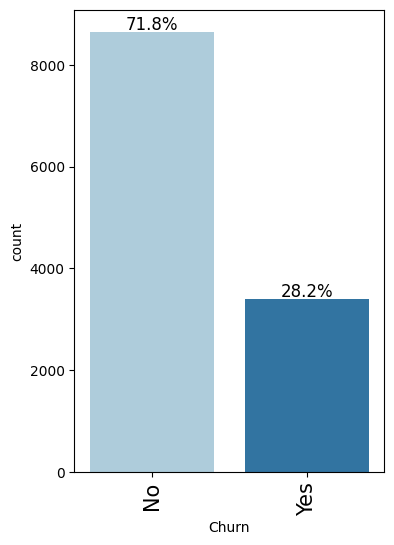

In [875]:
labeled_barplot(df, "Churn", perc=True)

**1.2. Gender Distribution**

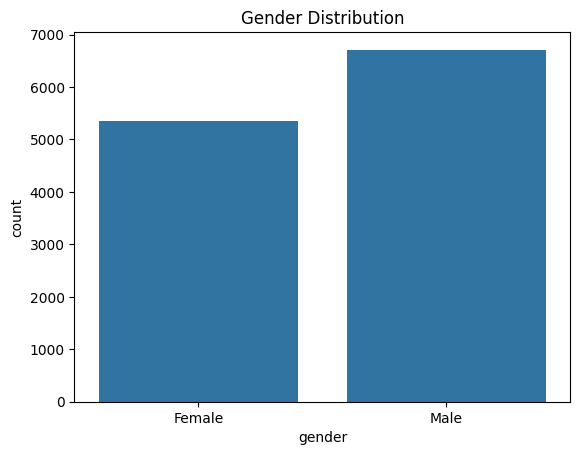

<Figure size 800x600 with 0 Axes>

In [876]:
sns.countplot(data=df, x="gender")
plt.title("Gender Distribution")
plt.figure(figsize=(8,6))
plt.show()

**1.3. Senior Citizen Distribution**

In [877]:
#converting "seniorCitizen" Column into categorical column
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)
df["SeniorCitizen"] = df["SeniorCitizen"].replace(["0","1"],["No","Yes"])

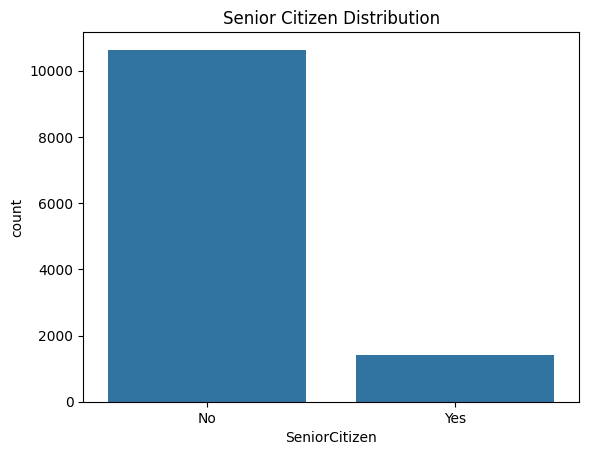

<Figure size 800x600 with 0 Axes>

In [878]:
sns.countplot(data=df, x="SeniorCitizen")
plt.title("Senior Citizen Distribution")
plt.figure(figsize=(8,6))
plt.show()

**1.4. Distribution of Customers having Partners**



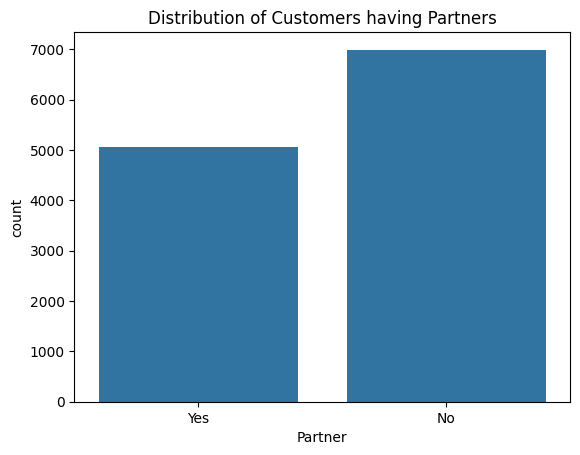

<Figure size 800x600 with 0 Axes>

In [879]:
sns.countplot(data=df, x="Partner")
plt.title("Distribution of Customers having Partners")
plt.figure(figsize=(8,6))
plt.show()

**1.5. Distribution of Customers having Dependents**



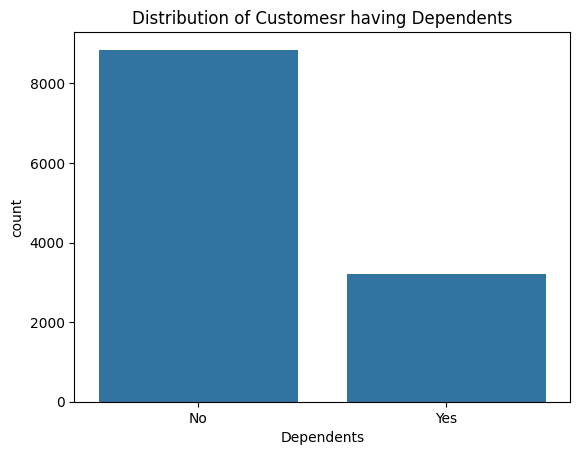

<Figure size 800x600 with 0 Axes>

In [880]:
sns.countplot(data=df, x="Dependents")
plt.title("Distribution of Customesr having Dependents")
plt.figure(figsize=(8,6))
plt.show()

1.6. Distribution of Tenure

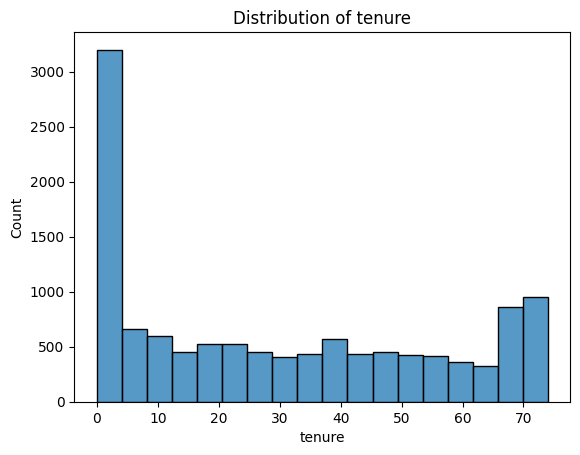

<Figure size 800x600 with 0 Axes>

In [881]:
sns.histplot(data=df, x="tenure")
plt.title("Distribution of tenure")
plt.figure(figsize=(8,6))
plt.show()

**1.7. Distribution of Phone Service**

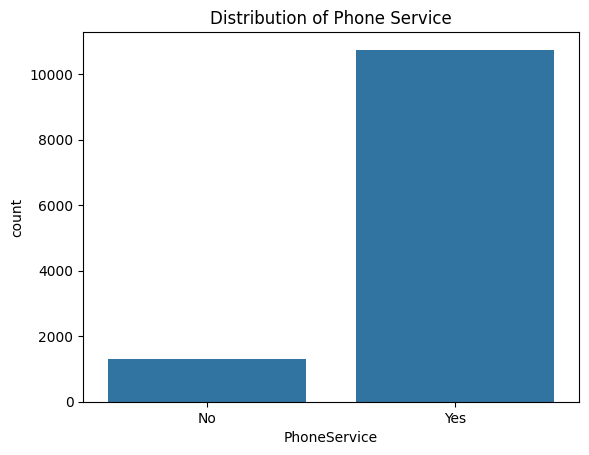

<Figure size 800x600 with 0 Axes>

In [882]:
sns.countplot(data=df, x="PhoneService")
plt.title("Distribution of Phone Service")
plt.figure(figsize=(8,6))
plt.show()

**1.8. Distribution of Multiple Lines**

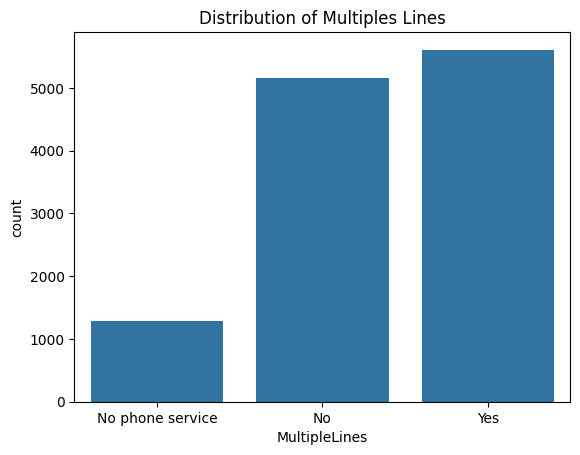

<Figure size 800x600 with 0 Axes>

In [883]:
sns.countplot(data=df, x="MultipleLines")
plt.title("Distribution of Multiples Lines")
plt.figure(figsize=(8,6))
plt.show()

**1.9. Distribution of Internet Service**

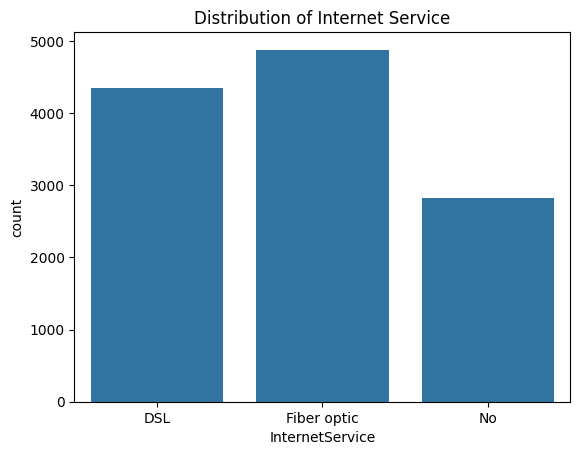

<Figure size 800x600 with 0 Axes>

In [884]:
sns.countplot(data=df, x="InternetService")
plt.title("Distribution of Internet Service")
plt.figure(figsize=(8,6))
plt.show()

**1.10. Distribution of Tech Support**

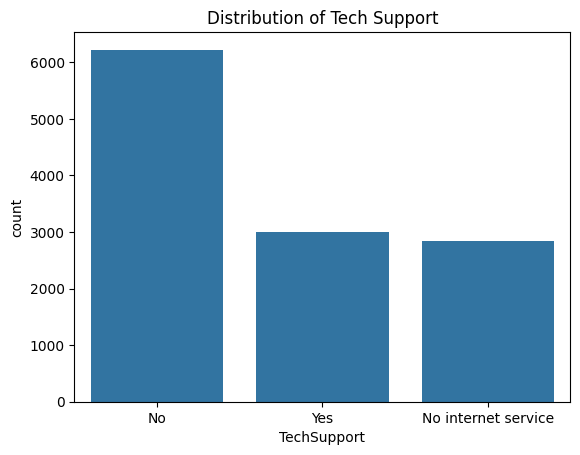

<Figure size 800x600 with 0 Axes>

In [885]:
sns.countplot(data=df, x="TechSupport")
plt.title("Distribution of Tech Support")
plt.figure(figsize=(8,6))
plt.show()

**1.11. Distribution of Contract**

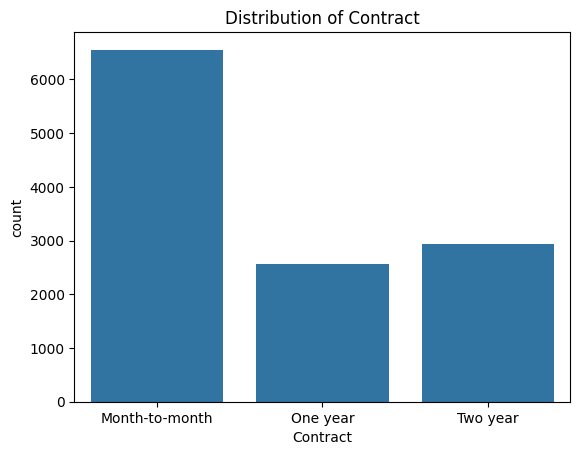

<Figure size 800x600 with 0 Axes>

In [886]:
sns.countplot(data=df, x="Contract")
plt.title("Distribution of Contract")
plt.figure(figsize=(8,6))
plt.show()

**1.12. Distribution of Payment Method**

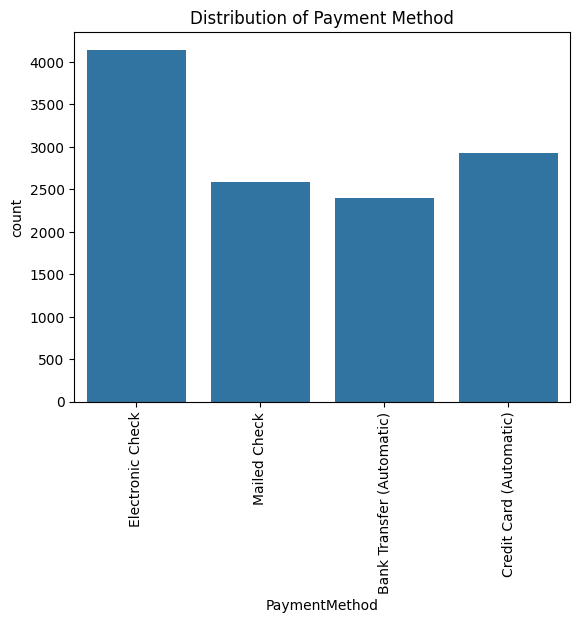

<Figure size 800x600 with 0 Axes>

In [887]:
sns.countplot(data=df, x="PaymentMethod")
plt.title("Distribution of Payment Method")
plt.xticks(rotation=90)
plt.figure(figsize=(8,6))
plt.show()

**1.13. Distribution of Monthly Charges**

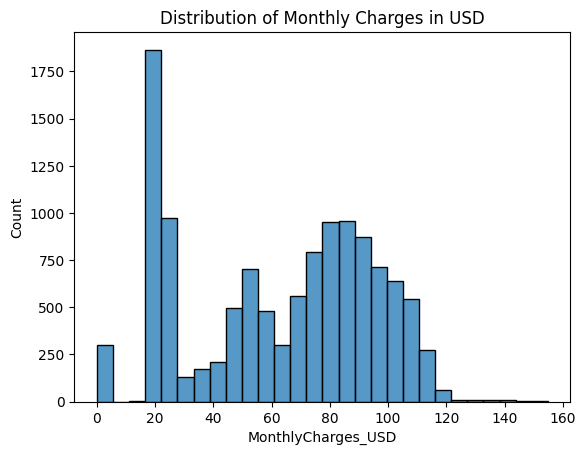

<Figure size 800x600 with 0 Axes>

In [888]:
sns.histplot(data=df, x="MonthlyCharges_USD")
plt.title("Distribution of Monthly Charges in USD")
plt.figure(figsize=(8,6))
plt.show()

**1.14. Distribution of Total Charges**

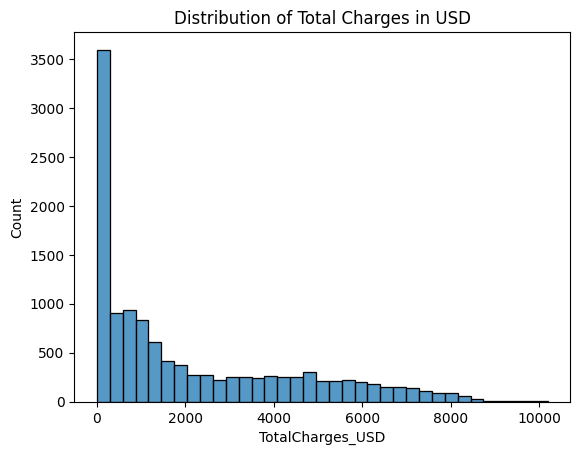

<Figure size 800x600 with 0 Axes>

In [889]:
sns.histplot(data=df, x="TotalCharges_USD")
plt.title("Distribution of Total Charges in USD")
plt.figure(figsize=(8,6))
plt.show()

# **2.Bivariate Analysis**

**2.1. Correlation Between Numeric Columns**

In [890]:
num_col_df = df[["tenure","MonthlyCharges_USD","TotalCharges_USD"]]
cat_col_df = df.select_dtypes(include="object")

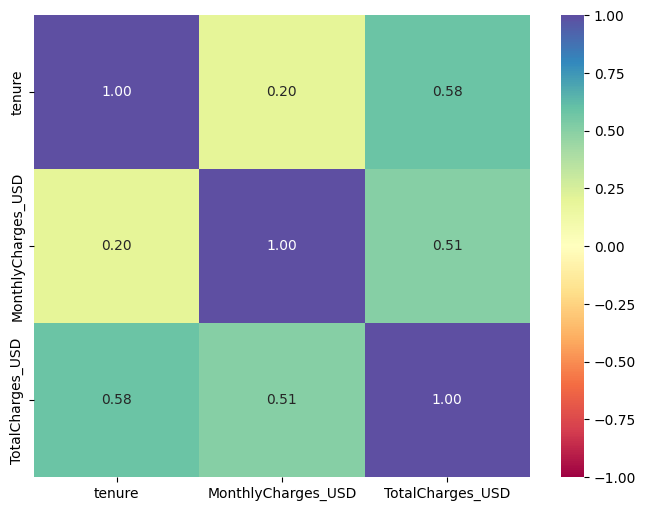

In [891]:
corr = num_col_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**2.2. Churn Vs Gender**

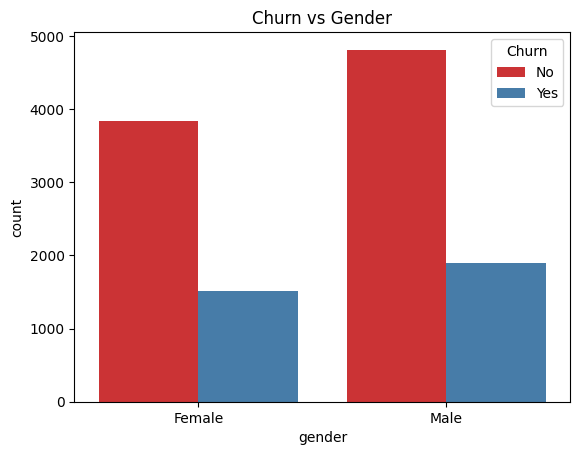

<Figure size 800x600 with 0 Axes>

In [892]:
sns.countplot(data=df, x="gender", hue="Churn", palette="Set1")
plt.title("Churn vs Gender")
plt.figure(figsize=(8,6))
plt.show()

**2.3. Churn Vs Senior Citizen**

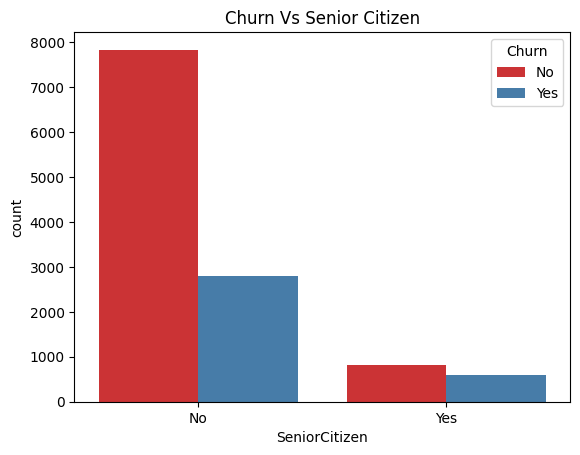

<Figure size 800x600 with 0 Axes>

In [893]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="Set1")
plt.title("Churn Vs Senior Citizen")
plt.figure(figsize=(8,6))
plt.show()

**2.4. Churn Vs Partner**

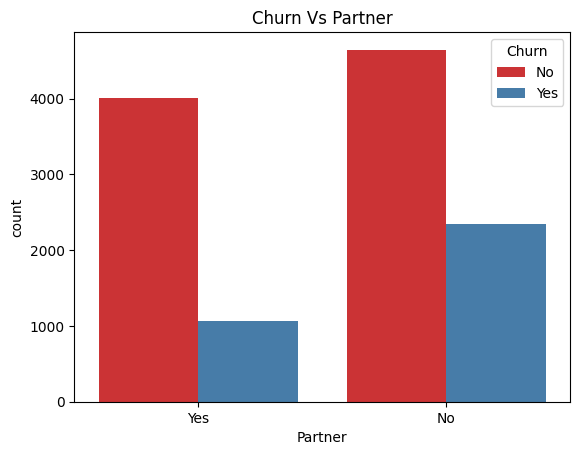

<Figure size 800x600 with 0 Axes>

In [894]:
sns.countplot(data=df, x="Partner", hue="Churn", palette="Set1")
plt.title("Churn Vs Partner")
plt.figure(figsize=(8,6))
plt.show()

**2.5. Churn Vs Dependents**

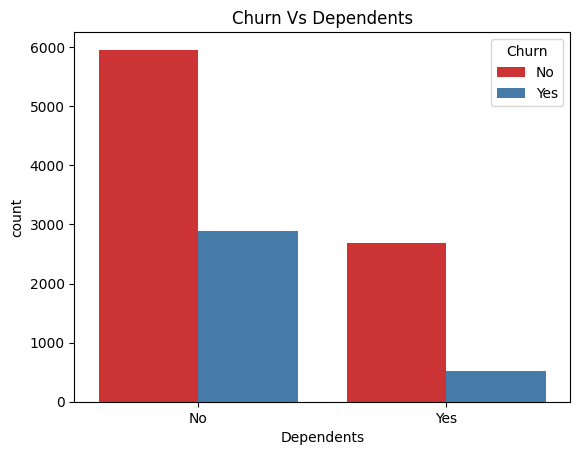

<Figure size 800x600 with 0 Axes>

In [895]:
sns.countplot(data=df, x="Dependents", hue="Churn", palette="Set1")
plt.title("Churn Vs Dependents")
plt.figure(figsize=(8,6))
plt.show()

In [896]:
def stacked_barplot(df, x_col, y_col):
    """
    Generates a stacked bar plot for two categorical columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The name of the column to be plotted on the x-axis.
        y_col (str): The name of the column to be used for stacking.
    """
    # Create a cross-tabulation of the two columns
    crosstab = pd.crosstab(df[x_col], df[y_col])

    # Plot the stacked bar plot
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'{y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

**2.6. Churn Vs Phone Service**

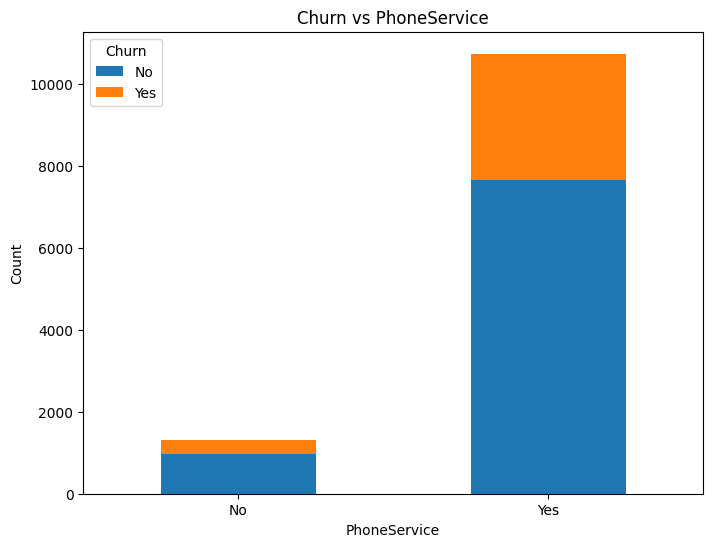

In [897]:
stacked_barplot(df, "PhoneService", "Churn")

**2.7. Chrun Vs Multiple Lines**

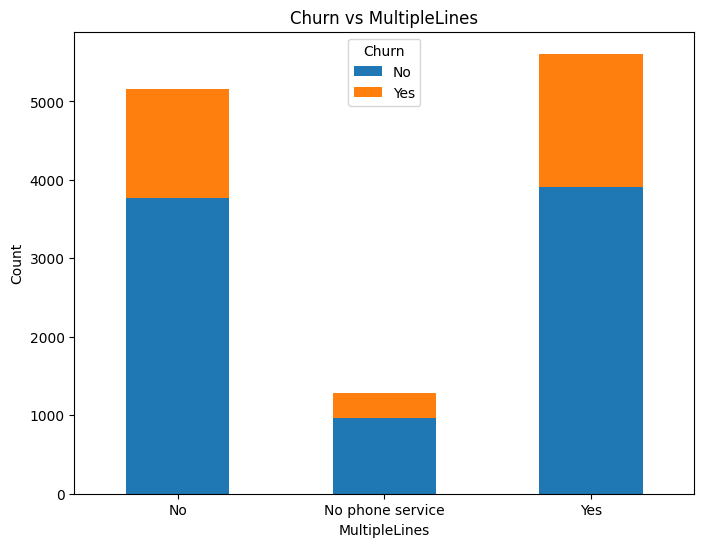

In [898]:
stacked_barplot(df, "MultipleLines", "Churn")

**2.8. Chrun Vs Internet Service**

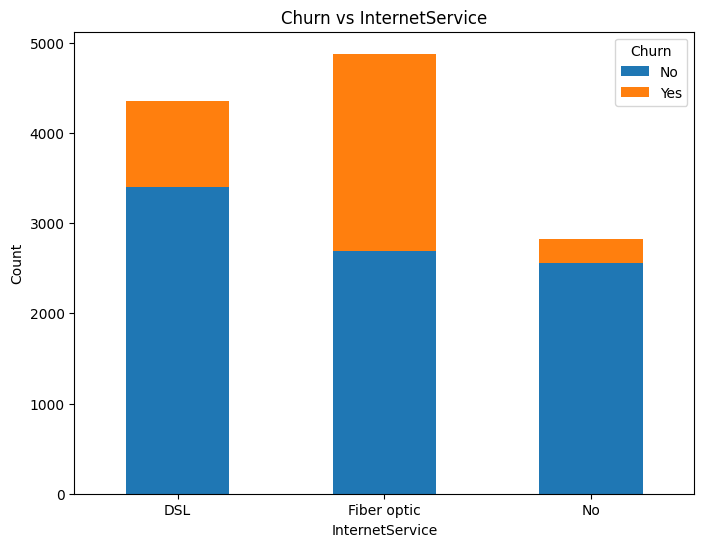

In [899]:
stacked_barplot(df, "InternetService", "Churn")

**2.9. Chrun Vs Contract**

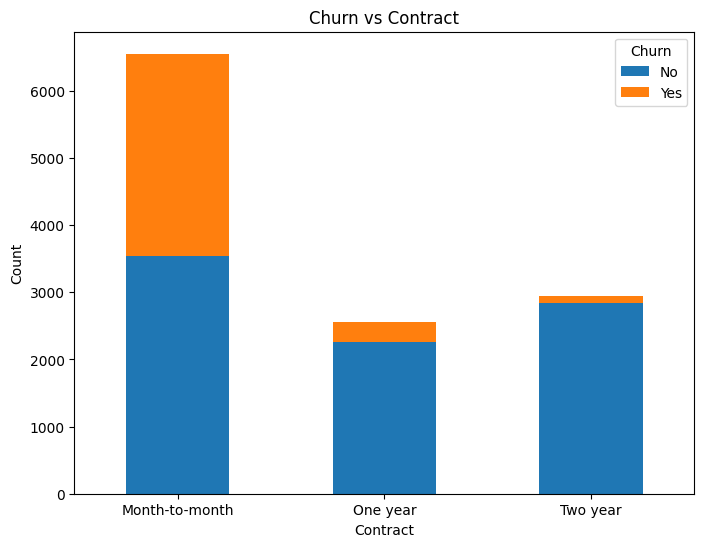

In [900]:
stacked_barplot(df, "Contract", "Churn")

In [901]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


**2.10. Chrun Rate Vs Tenure Group**

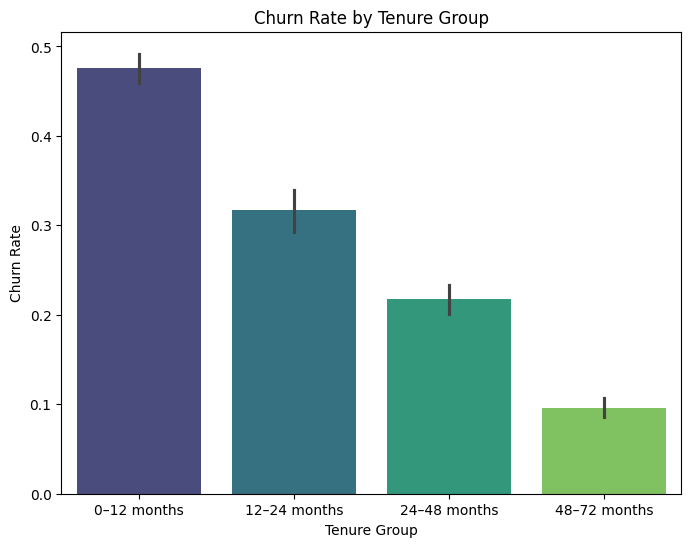

In [902]:
bins = [0, 12, 24, 48, 72]
labels = ["0–12 months", "12–24 months", "24–48 months", "48–72 months"]
df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels)

plt.figure(figsize=(8,6))
sns.barplot(x="tenure_group", y="Churn", data=df, estimator=lambda x: sum(x==1)/len(x), palette="viridis")
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate")
plt.show()


**2.11. Chrun Rate Vs Monthly Charges**

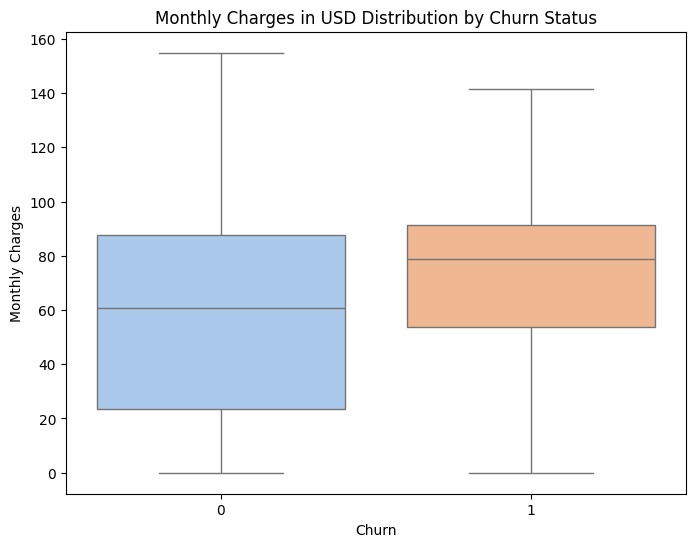

In [903]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="MonthlyCharges_USD", data=df, palette="pastel")
plt.title("Monthly Charges in USD Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


**2.12. Chrun Rate Vs Payment Method**

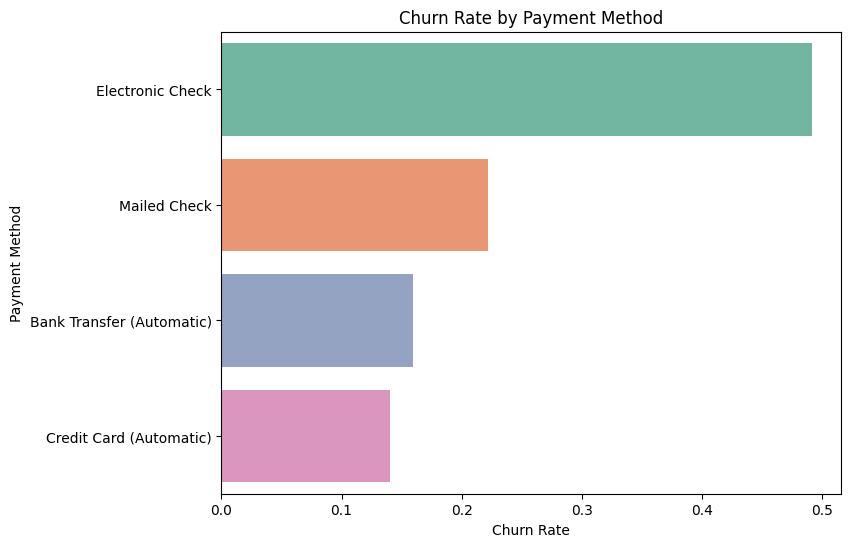

In [904]:
payment_churn = df.groupby("PaymentMethod")["Churn"].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x="Churn", y="PaymentMethod", data=payment_churn, palette="Set2")
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate")
plt.ylabel("Payment Method")
plt.show()


**2.13. Chrun Status Vs Total Charges**

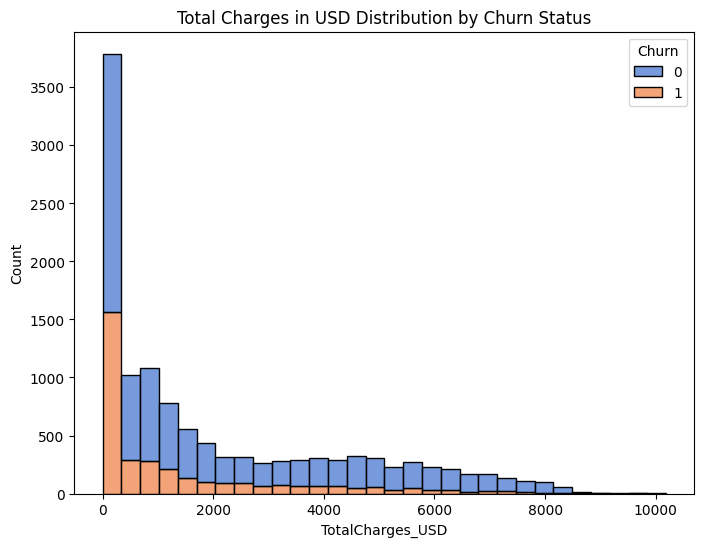

In [905]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="TotalCharges_USD", hue="Churn", multiple="stack", bins=30, palette="muted")
plt.title("Total Charges in USD Distribution by Churn Status")
plt.show()


**3. Multivariate Analysis**

**3.1 Churn Rate by Contract and Internet Service**

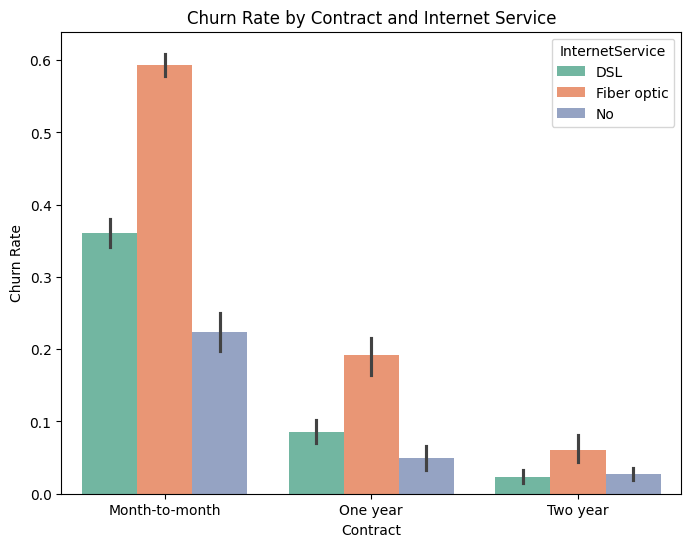

In [906]:
plt.figure(figsize=(8,6))
sns.barplot(x="Contract", y="Churn", hue="InternetService", data=df, palette="Set2")
plt.title("Churn Rate by Contract and Internet Service")
plt.ylabel("Churn Rate")
plt.show()

**3.2. Monthly Charges vs Tenure by Churn**

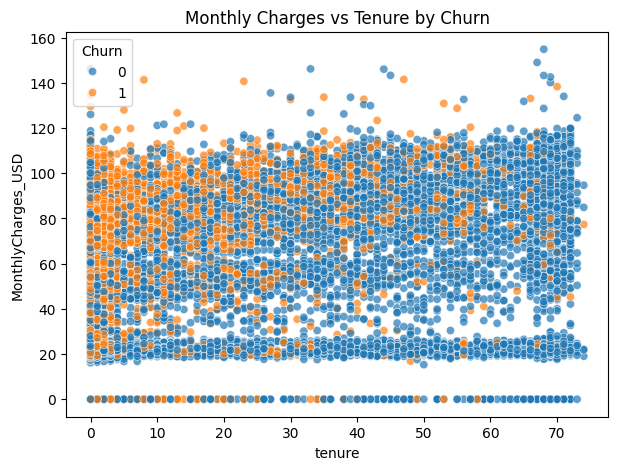

In [907]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="tenure",
    y="MonthlyCharges_USD",
    hue="Churn",
    data=df.replace({"Yes": 1, "No": 0}),
    alpha=0.7
)
plt.title("Monthly Charges vs Tenure by Churn")
plt.show()


**3.3. Total Charges vs Tenure by Churn**

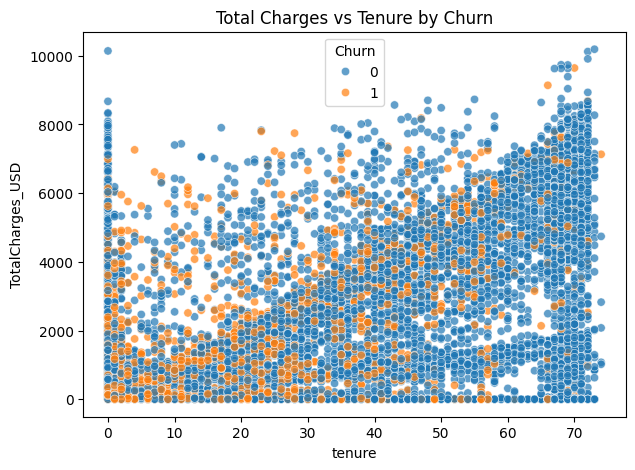

In [908]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="tenure",
    y="TotalCharges_USD",
    hue="Churn",
    data=df.replace({"Yes": 1, "No": 0}),
    alpha=0.7
)
plt.title("Total Charges vs Tenure by Churn")
plt.show()

# **Outlier Detection**

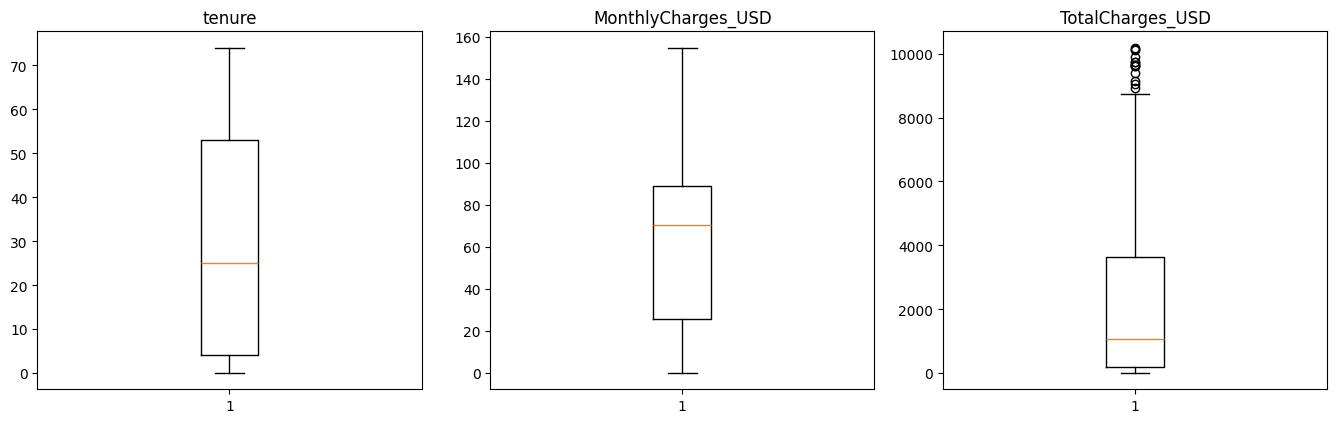

In [909]:
num_col_df = df[["tenure","MonthlyCharges_USD","TotalCharges_USD"]]

plt.figure(figsize=(18, 16))

for i, variable in enumerate(num_col_df):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

# **Feature Engineering**

In [910]:
pd.get_dummies(df,columns=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"],drop_first=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Churn,MonthlyCharges_USD,TotalCharges_USD,tenure_group,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card (Automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,Female,No,Yes,No,1.0,No,0,29.85,29.85,0–12 months,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,Male,No,No,No,34.0,Yes,0,56.95,1889.50,24–48 months,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,Male,No,No,No,2.0,Yes,1,53.85,108.15,0–12 months,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,Male,No,No,No,45.0,No,0,42.30,1840.75,24–48 months,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,Female,No,No,No,2.0,Yes,1,70.70,0.00,0–12 months,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Female,No,No,No,6.0,Yes,1,89.50,573.30,0–12 months,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False
12051,Female,No,Yes,Yes,1.0,Yes,1,74.70,0.00,0–12 months,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
12052,Male,No,No,No,72.0,Yes,0,113.40,8164.10,48–72 months,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False
12053,Female,No,Yes,No,57.0,Yes,0,99.65,5497.05,48–72 months,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False


In [911]:
# Convert all non-numeric (object or category) columns to 0 an 1
# defining X and y variables
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X.head()

,tenure,MonthlyCharges_USD,TotalCharges_USD,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card (Automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,tenure_group_12–24 months,tenure_group_24–48 months,tenure_group_48–72 months
0,1.0,29.85,29.85,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,34.0,56.95,1889.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2.0,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,70.70,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [912]:
# dropping "tenure_group"
df = df.drop("tenure_group", axis=1)

In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12055 entries, 0 to 12054
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              12055 non-null  object 
 1   SeniorCitizen       12055 non-null  object 
 2   Partner             12055 non-null  object 
 3   Dependents          12055 non-null  object 
 4   tenure              12055 non-null  float64
 5   PhoneService        12055 non-null  object 
 6   MultipleLines       12055 non-null  object 
 7   InternetService     12055 non-null  object 
 8   OnlineSecurity      12055 non-null  object 
 9   OnlineBackup        12055 non-null  object 
 10  DeviceProtection    12055 non-null  object 
 11  TechSupport         12055 non-null  object 
 12  StreamingTV         12055 non-null  object 
 13  StreamingMovies     12055 non-null  object 
 14  Contract            12055 non-null  object 
 15  PaperlessBilling    12055 non-null  object 
 16  Paym

In [914]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Data Preparation for Modeling**

**Creating training and test sets**

In [915]:
# Clean and convert churn column to numeric
data["Churn"] = data["Churn"].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})


In [916]:
# specifying the independent  and dependent variables
X = df.drop(["Churn"], axis=1)
Y = df["Churn"]

# creating dummy variables for categorical columns
X = pd.get_dummies(X, drop_first=True)

# adding a constant to the independent variables
X = sm.add_constant(X)

#Converting values to float
X = X.astype(float)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [917]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (8438, 31)
Shape of test set :  (3617, 31)
Percentage of classes in training set:
Churn
0    0.715809
1    0.284191
Name: proportion, dtype: float64
Percentage of classes in test set:
Churn
0    0.721592
1    0.278408
Name: proportion, dtype: float64


**Feature Scaling**

In [918]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [919]:
## Checking the Churn Rate
churn = (sum(df['Churn'])/len(df["Churn"].index))*100
churn

28.24554126918291

# **Model Building - Logistic Regression**

In [920]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8438
Model:                          Logit   Df Residuals:                     8407
Method:                           MLE   Df Model:                           30
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.2989
Time:                        11:45:00   Log-Likelihood:                -3530.8
converged:                       True   LL-Null:                       -5036.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2240      0.213     -1.052      0.293      -0.641       0.193
tenure                                   -0.0201  

In [921]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [922]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

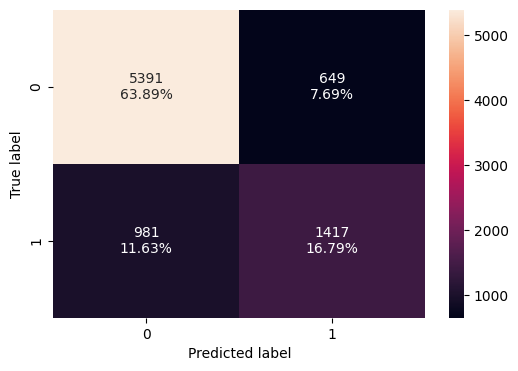

In [923]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [924]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806826,0.590909,0.685866,0.634857


# **Detecting and Dealing with Multicollinearity**

In [925]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                    57.829353
tenure                                    2.162023
MonthlyCharges_USD                        4.429824
TotalCharges_USD                          2.385112
gender_Male                               1.009116
SeniorCitizen_Yes                         1.086709
Partner_Yes                               1.308000
Dependents_Yes                            1.241239
PhoneService_Yes                          3.854919
MultipleLines_No phone service            3.850595
MultipleLines_Yes                         1.416443
InternetService_Fiber optic               2.346234
InternetService_No                       65.974451
OnlineSecurity_No internet service       59.692942
OnlineSecurity_Yes                        1.407150
OnlineBackup_No internet service         53.962426
OnlineBackup_Yes                          1.289946
DeviceProtection_No internet service     62.032420
DeviceProtection_Yes                      1.520

In [926]:
X_train1 = X_train.drop("StreamingMovies_No internet service", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                    57.829008
tenure                                    2.161296
MonthlyCharges_USD                        4.426442
TotalCharges_USD                          2.384971
gender_Male                               1.009096
SeniorCitizen_Yes                         1.086699
Partner_Yes                               1.307995
Dependents_Yes                            1.241228
PhoneService_Yes                          3.854131
MultipleLines_No phone service            3.850528
MultipleLines_Yes                         1.416443
InternetService_Fiber optic               2.346100
InternetService_No                       60.353334
OnlineSecurity_No internet service       58.734287
OnlineSecurity_Yes                        1.407150
OnlineBackup_No internet service         53.876926
OnlineBackup_Yes                          1.289830
DeviceProtection_No internet service     59.928585
DeviceProtection_Yes                      1.520

In [927]:
X_train2 = X_train1.drop("StreamingTV_No internet service", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                                    57.812627
tenure                                    2.161136
MonthlyCharges_USD                        4.424863
TotalCharges_USD                          2.384908
gender_Male                               1.009047
SeniorCitizen_Yes                         1.086667
Partner_Yes                               1.307845
Dependents_Yes                            1.241052
PhoneService_Yes                          3.853987
MultipleLines_No phone service            3.850139
MultipleLines_Yes                         1.416438
InternetService_Fiber optic               2.345880
InternetService_No                       56.071001
OnlineSecurity_No internet service       55.849265
OnlineSecurity_Yes                        1.407045
OnlineBackup_No internet service         50.007526
OnlineBackup_Yes                          1.289763
DeviceProtection_No internet service     59.415993
DeviceProtection_Yes                      1.520

In [928]:
X_train3 = X_train2.drop("DeviceProtection_No internet service", axis=1)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

Series before feature selection: 

const                                    57.760302
tenure                                    2.160975
MonthlyCharges_USD                        4.424761
TotalCharges_USD                          2.384666
gender_Male                               1.009007
SeniorCitizen_Yes                         1.086666
Partner_Yes                               1.307816
Dependents_Yes                            1.241045
PhoneService_Yes                          3.853753
MultipleLines_No phone service            3.849660
MultipleLines_Yes                         1.416227
InternetService_Fiber optic               2.345875
InternetService_No                       53.902674
OnlineSecurity_No internet service       54.449732
OnlineSecurity_Yes                        1.406984
OnlineBackup_No internet service         47.288878
OnlineBackup_Yes                          1.289523
DeviceProtection_Yes                      1.512116
TechSupport_No internet service          44.200

In [929]:
X_train4 = X_train3.drop("OnlineSecurity_No internet service", axis=1)
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])],
    index=X_train4.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series5))

Series before feature selection: 

const                                    57.719144
tenure                                    2.160957
MonthlyCharges_USD                        4.423179
TotalCharges_USD                          2.384664
gender_Male                               1.008997
SeniorCitizen_Yes                         1.086666
Partner_Yes                               1.307774
Dependents_Yes                            1.240993
PhoneService_Yes                          3.853440
MultipleLines_No phone service            3.849659
MultipleLines_Yes                         1.416226
InternetService_Fiber optic               2.345870
InternetService_No                       47.876473
OnlineSecurity_Yes                        1.393247
OnlineBackup_No internet service         39.977523
OnlineBackup_Yes                          1.289484
DeviceProtection_Yes                      1.511844
TechSupport_No internet service          39.828568
TechSupport_Yes                           1.492

In [930]:
X_train5 = X_train4.drop("OnlineBackup_No internet service", axis=1)
vif_series6 = pd.Series(
    [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])],
    index=X_train5.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series6))

Series before feature selection: 

const                                    57.705749
tenure                                    2.160710
MonthlyCharges_USD                        4.417255
TotalCharges_USD                          2.383065
gender_Male                               1.008942
SeniorCitizen_Yes                         1.086591
Partner_Yes                               1.307695
Dependents_Yes                            1.240968
PhoneService_Yes                          3.852818
MultipleLines_No phone service            3.849653
MultipleLines_Yes                         1.416221
InternetService_Fiber optic               2.345071
InternetService_No                       33.665881
OnlineSecurity_Yes                        1.392426
OnlineBackup_Yes                          1.288652
DeviceProtection_Yes                      1.510858
TechSupport_No internet service          34.069614
TechSupport_Yes                           1.492593
StreamingTV_Yes                           1.694

In [931]:
X_train6 = X_train5.drop("TechSupport_No internet service", axis=1)
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])],
    index=X_train6.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series7))

Series before feature selection: 

const                                    57.527874
tenure                                    2.160707
MonthlyCharges_USD                        4.370757
TotalCharges_USD                          2.381408
gender_Male                               1.008912
SeniorCitizen_Yes                         1.086550
Partner_Yes                               1.307361
Dependents_Yes                            1.240549
PhoneService_Yes                          3.848604
MultipleLines_No phone service            3.849531
MultipleLines_Yes                         1.416036
InternetService_Fiber optic               2.344745
InternetService_No                        3.470216
OnlineSecurity_Yes                        1.391769
OnlineBackup_Yes                          1.288505
DeviceProtection_Yes                      1.508624
TechSupport_Yes                           1.484166
StreamingTV_Yes                           1.694816
StreamingMovies_Yes                       1.700

In [932]:
logit2 = sm.Logit(y_train, X_train6.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train6, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806826,0.588824,0.68677,0.634037


In [933]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8438
Model:                          Logit   Df Residuals:                     8413
Method:                           MLE   Df Model:                           24
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.2983
Time:                        11:45:05   Log-Likelihood:                -3533.8
converged:                       True   LL-Null:                       -5036.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.2441      0.212     -1.149      0.251      -0.661       0.172
tenure                                   -0.0201  

# **Removing high p-value variables**

In [934]:
# initial list of columns
cols = X_train6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train6[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['tenure', 'TotalCharges_USD', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (Automatic)', 'PaymentMethod_Electronic Check']


In [935]:
X_train7 = X_train6[selected_features]

In [936]:
logit3 = sm.Logit(y_train, X_train7.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8438
Model:                          Logit   Df Residuals:                     8422
Method:                           MLE   Df Model:                           15
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.2973
Time:                        11:45:06   Log-Likelihood:                -3538.9
converged:                       True   LL-Null:                       -5036.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
tenure                                   -0.0202      0.002    -10.614      0.000      -0.024      -0.017
TotalCharges_USD                      -9.851e-05  

# **Coefficient Interpretations**

In [937]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train7.columns)

,Odds,Change_odd%
tenure,0.979964,-2.003577
TotalCharges_USD,0.999901,-0.009850
Dependents_Yes,0.724356,-27.564424
PhoneService_Yes,0.792001,-20.799922
MultipleLines_Yes,1.329066,32.906620
InternetService_Fiber optic,2.500871,150.087105
InternetService_No,0.346647,-65.335269
OnlineSecurity_Yes,0.625216,-37.478370
OnlineBackup_Yes,0.787646,-21.235382
DeviceProtection_Yes,0.878510,-12.148955


# **Checking performance of the new model**

**Training set performance**

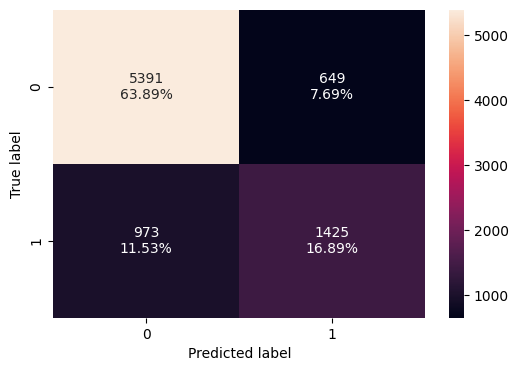

In [938]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train7, y_train)

In [939]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train7, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.807774,0.594245,0.687078,0.637299


**Test set performance**

In [940]:
X_test7 = X_test[list(X_train7.columns)]

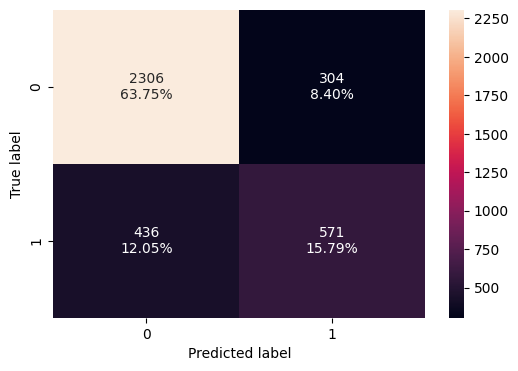

In [941]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test7, y_test)

In [942]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test7, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795411,0.567031,0.652571,0.606801
